### 1. Descrição do Dataset

* **Nome do dataset:** Percentuais de Atrasos e Cancelamentos de Voos (Voo Regular)
* **Link original:** Os dados são parte do acervo da ANAC, geralmente encontrados em: [https://www.gov.br/anac/pt-br/dadosabertos/Voos-e-operacoes-aereas/Percentuais-de-atrasos-e-cancelamentos/](https://www.gov.br/anac/pt-br/dadosabertos/Voos-e-operacoes-aereas/Percentuais-de-atrasos-e-cancelamentos/) ou https://sistemas.anac.gov.br/dadosabertos/Voos%20e%20operações%20aéreas/Percentuais%20de%20atrasos%20e%20cancelamentos/2024/12%20-%20dezembro/
  
* **Órgão responsável pela publicação:** Agência Nacional de Aviação Civil (ANAC)
* **Descrição do tema e finalidade:** O conjunto de dados detalha a performance de pontualidade e regularidade de cada voo regular operado no Brasil (doméstico ou internacional). A sua finalidade é dar transparência ao desempenho das companhias aéreas, permitindo o monitoramento e a fiscalização do setor, além de servir como insumo para pesquisas e análises sobre a aviação civil brasileira.
* **Número de registros e colunas:** O arquivo `Anexo I.csv` possui **5.088 registros** e **10 colunas**.
* **Significado de algumas variáveis importantes:**
    * `Empresa_Aerea`: Nome da companhia aérea responsável pelo voo.
    * `N_Voo`: Número que identifica a linha/serviço aéreo.
    * `Aeroporto_Origem_Designador_OACI`: Código OACI (4 letras) do aeroporto de origem.
    * `Aeroporto_Destino_Designador_OACI`: Código OACI (4 letras) do aeroporto de destino.
    * `Etapas_Previstas`: O número de vezes que aquele voo estava programado para ocorrer no mês.
    * `Percentuais_de_Cancelamentos`: A porcentagem de etapas que foram canceladas.
    * `Percentuais_de_Atrasos_superiores_a_30_minutos`: A porcentagem de etapas que partiram com mais de 30 minutos de atraso.
    * `Percentuais_de_Atrasos_superiores_a_60_minutos`: A porcentagem de etapas que partiram com mais de 60 minutos de atraso.

In [17]:
# --- 1. Importação das Bibliotecas ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("--- INICIANDO ANÁLISE ---")

# --- 2. Carregamento e Limpeza dos Dados ---
try:
    df = pd.read_csv(
        'Anexo I.csv',
        sep=';',
        skiprows=1,
        decimal=',',
        encoding='utf-8'
    )
    df.columns = [
        'empresa_aerea', 'n_voo', 'origem_oaci', 'origem_nome',
        'destino_oaci', 'destino_nome', 'etapas_previstas',
        'perc_cancelamentos', 'perc_atrasos_30min', 'perc_atrasos_60min'
    ]
    print("\n[SUCESSO] Dados carregados e colunas renomeadas.")
except FileNotFoundError:
    print("\n[ERRO] Arquivo 'Anexo I.csv' não encontrado. Verifique se o arquivo está na mesma pasta.")
    exit()

# --- 3. Engenharia de Nova Feature: Cálculo de Voos Cancelados Absolutos ---
# Criando uma coluna com o número absoluto de voos cancelados para cada rota
df['voos_cancelados_abs'] = (df['etapas_previstas'] * (df['perc_cancelamentos'] / 100)).round()


# --- 4. Cálculo Completo das Estatísticas Descritivas (Etapas Originais) ---
numeric_cols = ['etapas_previstas', 'perc_cancelamentos', 'perc_atrasos_30min', 'perc_atrasos_60min']

print("\n--- Estatísticas Descritivas (Média, Desvio Padrão, Mín/Máx, Quartis) ---")
print(df[numeric_cols].describe())

print("\n--- Mediana ---")
print(df[numeric_cols].median())

print("\n--- Moda ---")
print(df[numeric_cols].mode().iloc[0])

print("\n--- Variância ---")
print(df[numeric_cols].var())

# Cálculo e exibição do Intervalo Interquartil (IQR)
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
print("\n--- Intervalo Interquartil (IQR) ---")
print(IQR)

print("\n--- Contagem de Valores Ausentes e Tipos de Dados ---")
# Usando o df.info() original, conforme solicitado
df.info()

--- INICIANDO ANÁLISE ---

[SUCESSO] Dados carregados e colunas renomeadas.

--- Estatísticas Descritivas (Média, Desvio Padrão, Mín/Máx, Quartis) ---
       etapas_previstas  perc_cancelamentos  perc_atrasos_30min  \
count      12638.000000        12638.000000        12638.000000   
mean          15.267131            3.391344            7.658802   
std           11.556489           12.358020           16.704904   
min            1.000000            0.000000            0.000000   
25%            3.000000            0.000000            0.000000   
50%           14.000000            0.000000            0.000000   
75%           28.000000            0.000000            9.680000   
max           31.000000          100.000000          100.000000   

       perc_atrasos_60min  
count        12638.000000  
mean             2.849038  
std             10.000372  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max            100.00

#### 1. A Grande Diferença entre Média, Mediana e Moda

Essas três medidas nos contam histórias diferentes sobre os mesmos dados.

* **O que é cada uma?**
    * **Moda:** O resultado **mais comum**. Para atrasos e cancelamentos, a moda é **0%**. Isso significa que o cenário mais frequente é o de um voo operar sem nenhum problema.
    * **Mediana:** O valor do **meio**. Se organizarmos todos os voos do melhor para o pior, o voo do meio (a mediana) também teve **0%** de problemas. Isso confirma que **pelo menos metade de todos os voos operaram perfeitamente**.
    * **Média:** A soma de todos os percentuais dividida pelo total de voos. A média de atrasos, por exemplo, é de **7.66%**.

* **Principal Conclusão:**
    * Se o mais comum (Moda) e o cenário central (Mediana) são **0%**, por que a média é tão alta?
    * **Resposta:** A média é "puxada para cima" por um pequeno número de voos com taxas altíssimas de atraso e cancelamento (os *outliers*). A maioria dos voos é pontual, mas alguns poucos são tão problemáticos que elevam a média geral.

---

#### 2. Desvio Padrão e Variância: Medindo a Inconsistência

Essas métricas medem o quão "espalhados" ou "dispersos" os dados estão.

* **O que significam valores altos?**
    * Um desvio padrão alto (como **16.7** para atrasos) indica uma **grande inconsistência** na operação.
    * Em outras palavras, não existe um desempenho padrão. Enquanto muitos voos têm 0% de atraso, outros chegam a 50% ou até 100%.

* **Principal Conclusão:**
    * Os problemas de pontualidade não são um mal generalizado que afeta todos os voos um pouco. Pelo contrário, eles estão **fortemente concentrados** em rotas, dias ou operações específicas.

---

#### 3. Quartis: Fatiando os Dados para Entender a Maioria

Os quartis dividem os dados em quatro partes iguais, nos ajudando a ver onde a maioria se encaixa.

* **O que o 3º Quartil (Q3) nos diz?**
    * O valor do Q3 para atrasos acima de 30 minutos é de **9.68%**.
    * **Tradução:** **75% de todos os voos** tiveram uma taxa de atraso **inferior a 9.68%**.

* **Principal Conclusão:**
    * A grande maioria da operação aérea tem um desempenho bom ou aceitável. Os problemas mais graves estão concentrados nos **25% piores voos**, que são os que realmente precisam de atenção.

---

### Resumo Geral da Análise

As estatísticas pintam um quadro muito claro:

> A operação aérea, em sua maioria, é **muito pontual e regular**. O cenário mais comum e o retrato da "metade central" dos voos é de zero atrasos e zero cancelamentos. No entanto, uma **minoria significativa de voos muito problemáticos** distorce as médias e representa os principais focos de irregularidade. A chave para a melhoria está em identificar e atuar nesses pontos críticos, e não em uma mudança generalizada.


--- GERANDO VISUALIZAÇÕES ---

Gerando gráfico: Top 15 Companhias por MÉDIA PERCENTUAL de Cancelamentos...


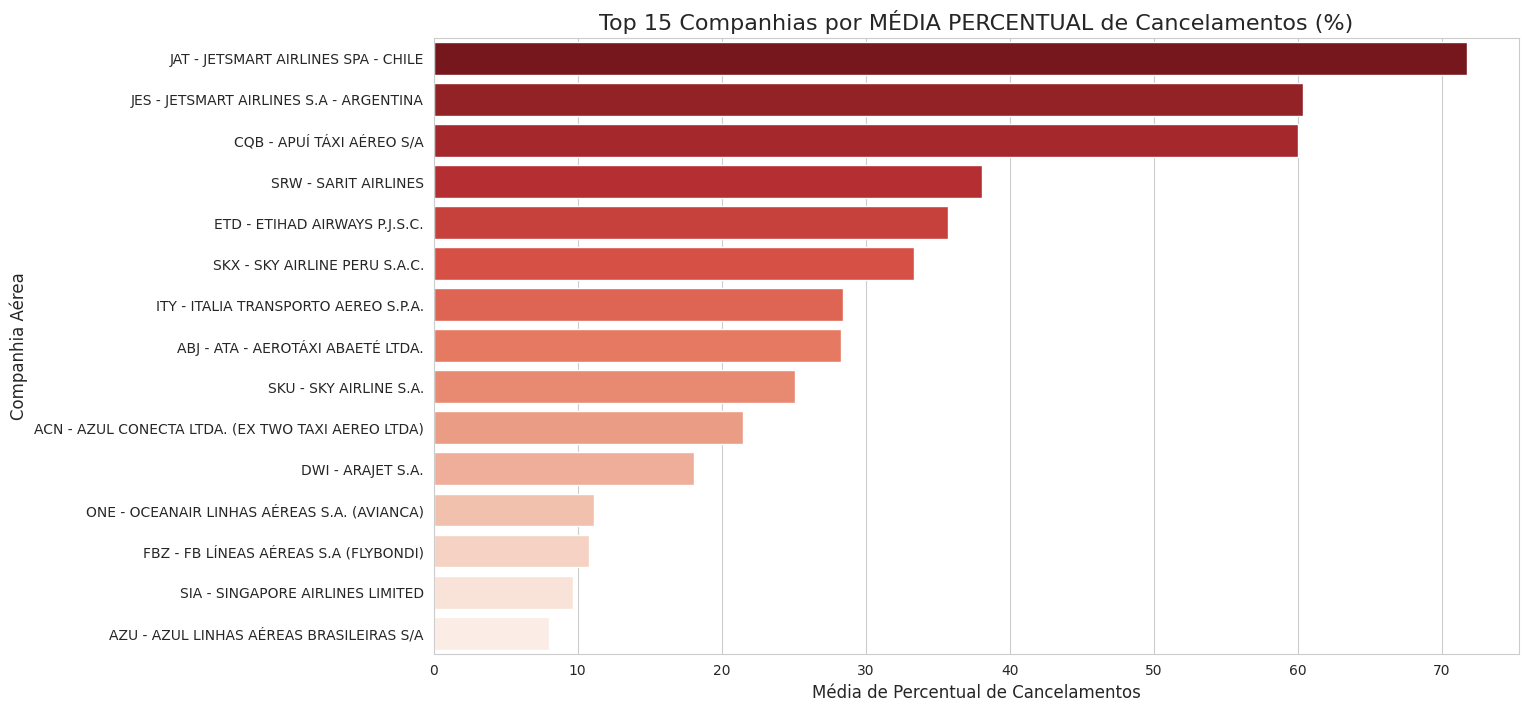


Gerando gráfico: Top 15 Aeroportos por MÉDIA PERCENTUAL de Cancelamentos...


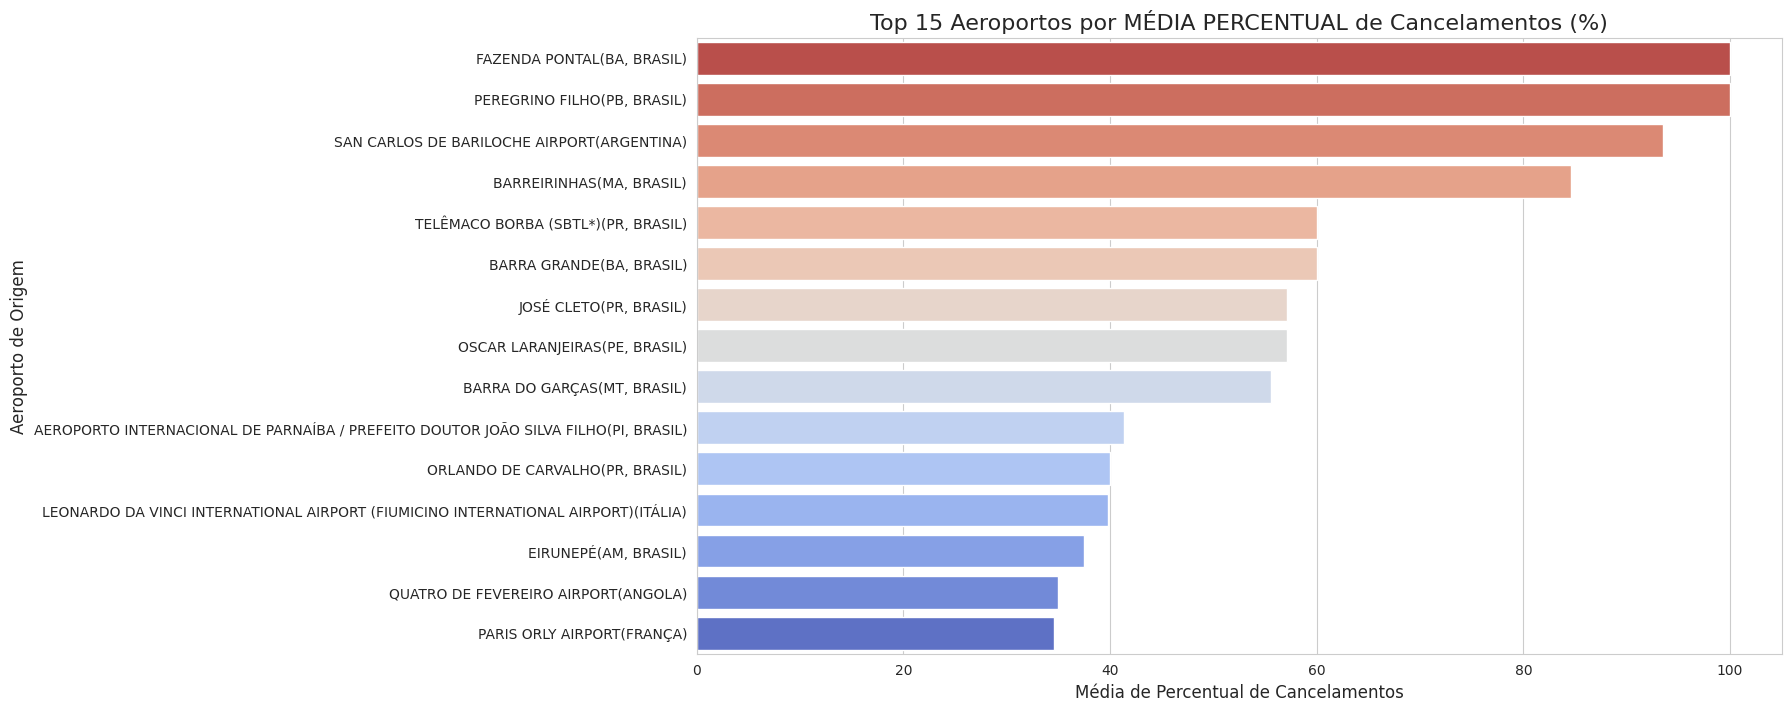


Gerando gráfico: Top 15 Companhias por NÚMERO ABSOLUTO de Voos Cancelados...


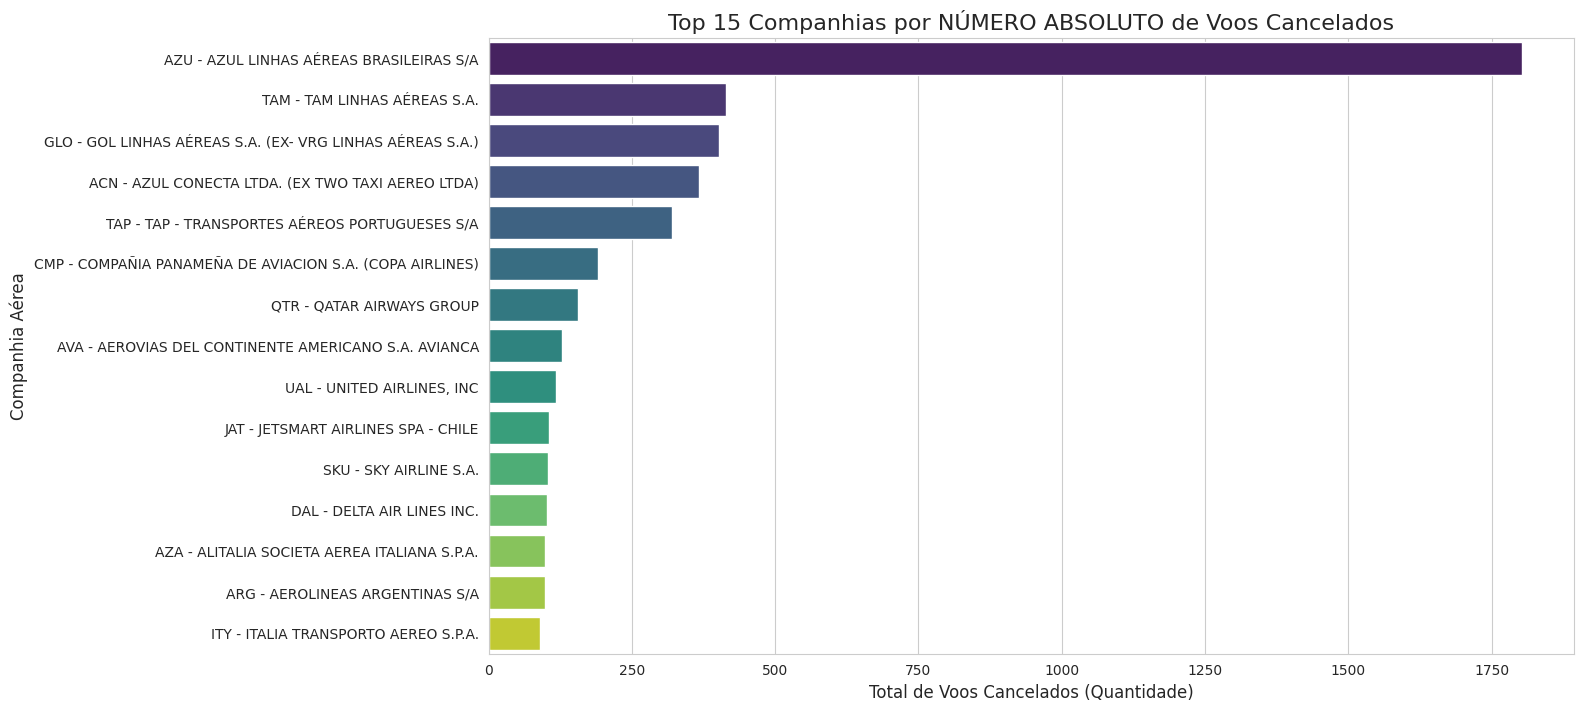


Gerando gráfico: Top 15 Aeroportos por NÚMERO ABSOLUTO de Voos Cancelados...


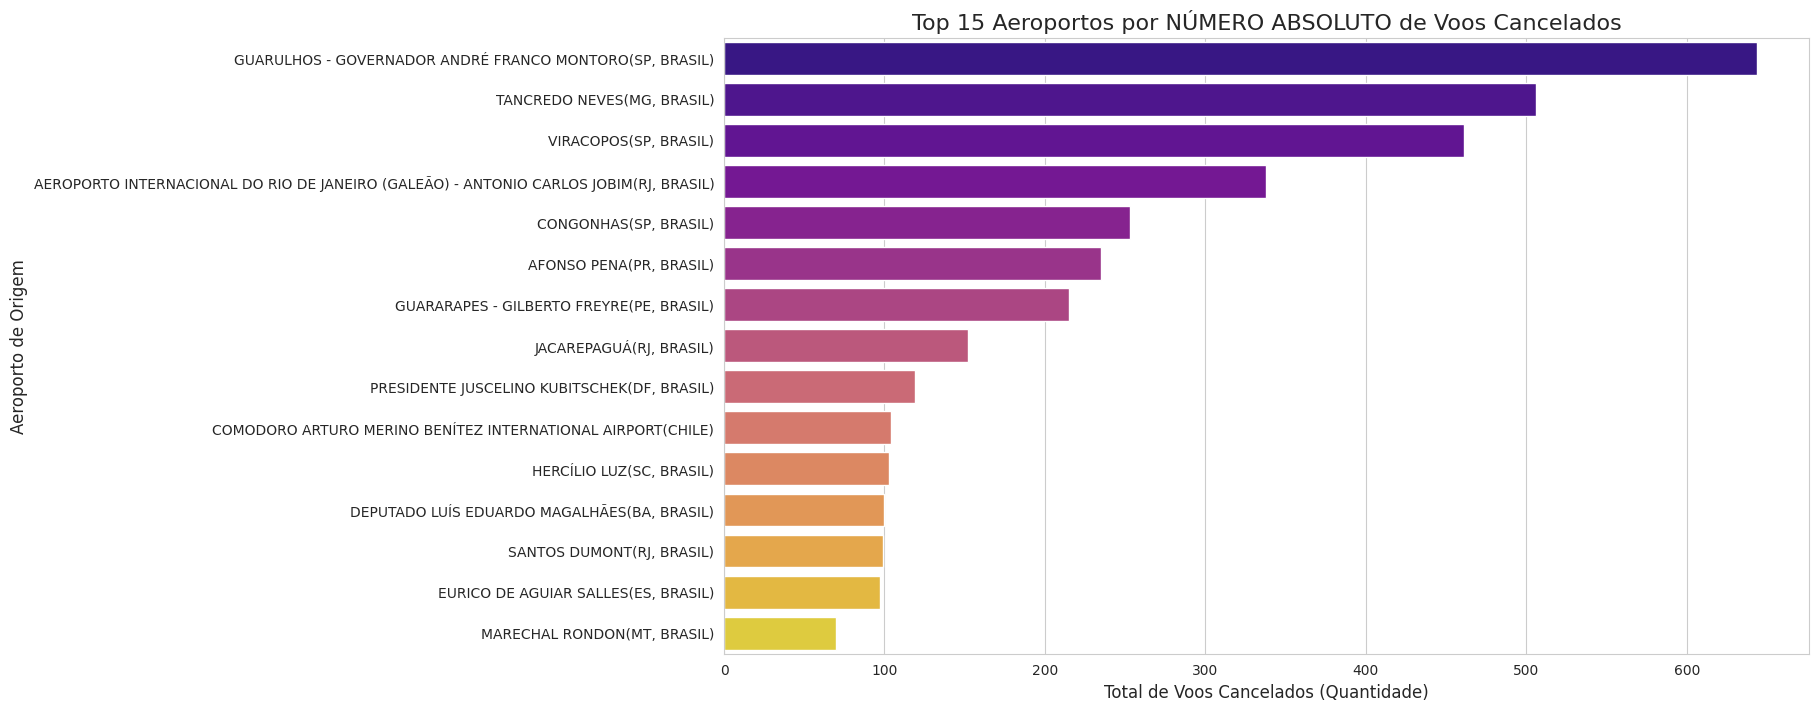

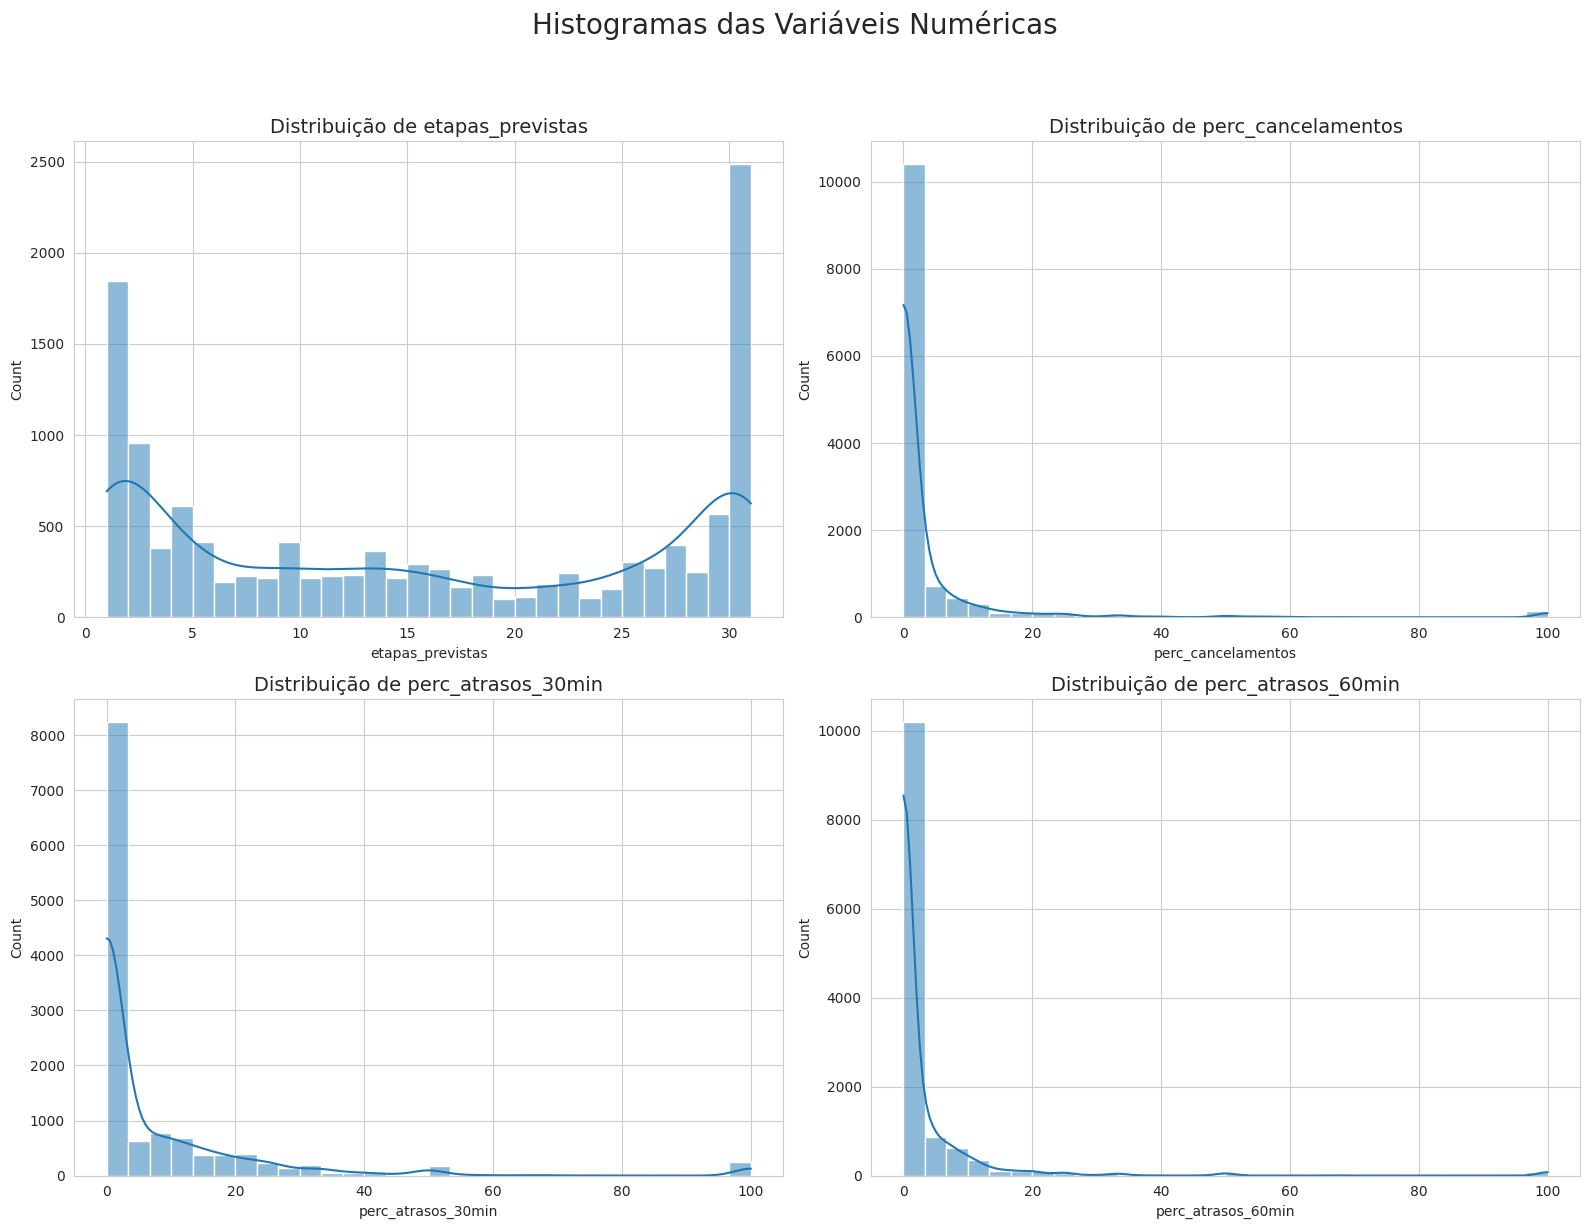

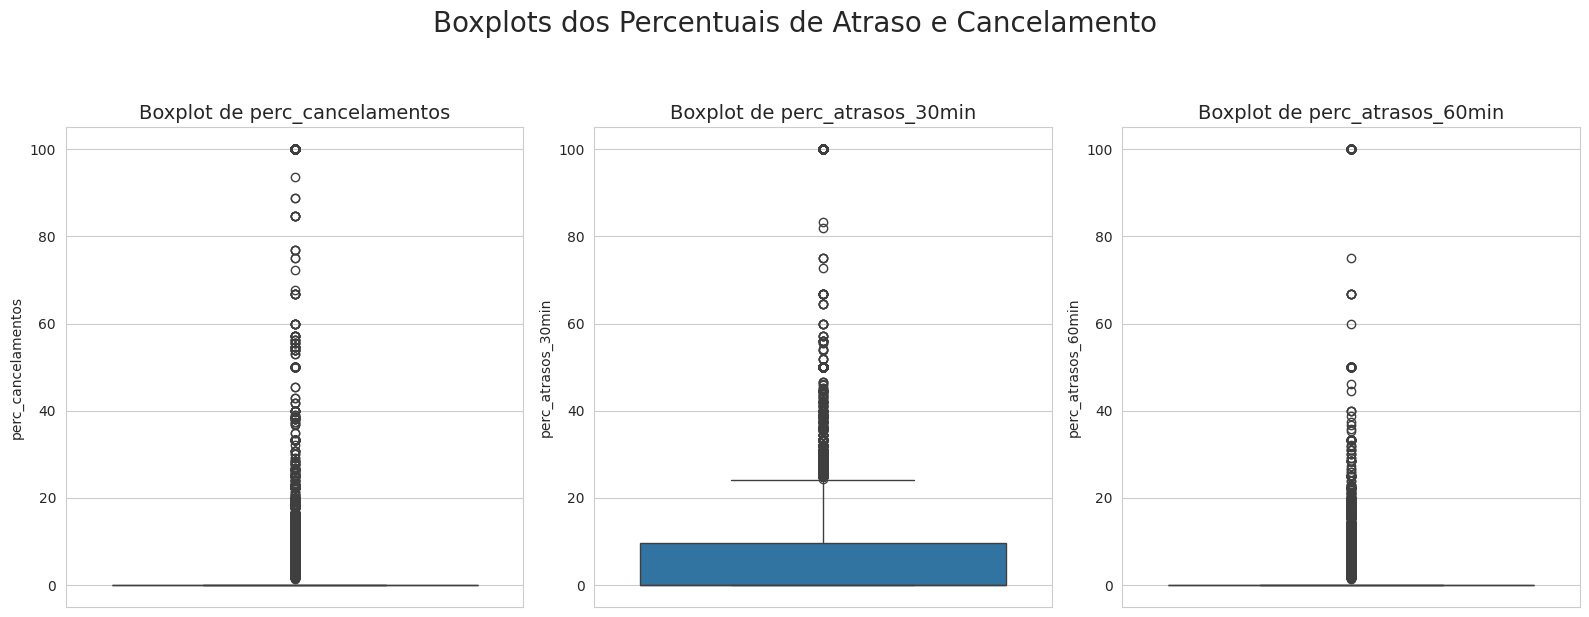

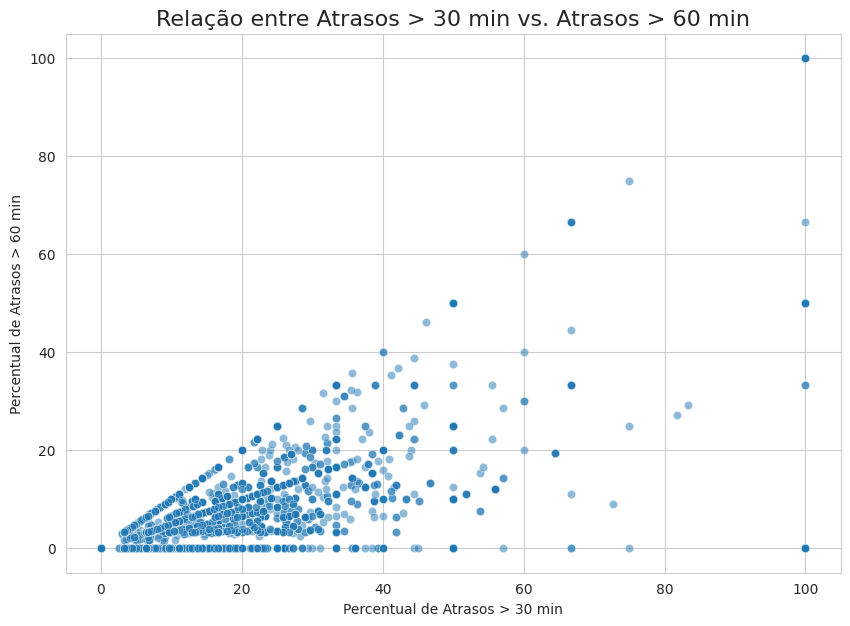


--- ANÁLISE CONCLUÍDA ---


In [18]:
# --- 5. Geração das Visualizações ---
print("\n--- GERANDO VISUALIZAÇÕES ---")
sns.set_style("whitegrid")

# --- GRÁFICOS DE PERCENTUAL DE CANCELAMENTO ---

# Análise 1: Média de Cancelamentos por Companhia Aérea (PERCENTUAL)
print("\nGerando gráfico: Top 15 Companhias por MÉDIA PERCENTUAL de Cancelamentos...")
media_cancel_cia = df.groupby('empresa_aerea')['perc_cancelamentos'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(
    x='perc_cancelamentos', y='empresa_aerea', data=media_cancel_cia.head(15),
    palette='Reds_r', hue='empresa_aerea', legend=False
)
plt.title('Top 15 Companhias por MÉDIA PERCENTUAL de Cancelamentos (%)', fontsize=16)
plt.xlabel('Média de Percentual de Cancelamentos', fontsize=12)
plt.ylabel('Companhia Aérea', fontsize=12)
plt.show()

# Análise 2: Média de Cancelamentos por Aeroporto de Origem (PERCENTUAL)
print("\nGerando gráfico: Top 15 Aeroportos por MÉDIA PERCENTUAL de Cancelamentos...")
media_cancel_origem = df.groupby('origem_nome')['perc_cancelamentos'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(
    x='perc_cancelamentos', y='origem_nome', data=media_cancel_origem.head(15),
    palette='coolwarm_r', hue='origem_nome', legend=False
)
plt.title('Top 15 Aeroportos por MÉDIA PERCENTUAL de Cancelamentos (%)', fontsize=16)
plt.xlabel('Média de Percentual de Cancelamentos', fontsize=12)
plt.ylabel('Aeroporto de Origem', fontsize=12)
plt.show()


# --- GRÁFICOS DE QUANTIDADE ABSOLUTA DE CANCELAMENTOS ---

# Análise 3: Total de voos cancelados por Companhia Aérea (QUANTIDADE)
print("\nGerando gráfico: Top 15 Companhias por NÚMERO ABSOLUTO de Voos Cancelados...")
total_cancel_cia = df.groupby('empresa_aerea')['voos_cancelados_abs'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(
    x='voos_cancelados_abs', y='empresa_aerea', data=total_cancel_cia.head(15),
    palette='viridis', hue='empresa_aerea', legend=False
)
plt.title('Top 15 Companhias por NÚMERO ABSOLUTO de Voos Cancelados', fontsize=16)
plt.xlabel('Total de Voos Cancelados (Quantidade)', fontsize=12)
plt.ylabel('Companhia Aérea', fontsize=12)
plt.show()

# Análise 4: Total de voos cancelados por Aeroporto de Origem (QUANTIDADE)
print("\nGerando gráfico: Top 15 Aeroportos por NÚMERO ABSOLUTO de Voos Cancelados...")
total_cancel_origem = df.groupby('origem_nome')['voos_cancelados_abs'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(
    x='voos_cancelados_abs', y='origem_nome', data=total_cancel_origem.head(15),
    palette='plasma', hue='origem_nome', legend=False
)
plt.title('Top 15 Aeroportos por NÚMERO ABSOLUTO de Voos Cancelados', fontsize=16)
plt.xlabel('Total de Voos Cancelados (Quantidade)', fontsize=12)
plt.ylabel('Aeroporto de Origem', fontsize=12)
plt.show()


# --- VISUALIZAÇÕES ADICIONAIS (ETAPAS ORIGINAIS) ---

# Criação de Histogramas
percent_cols = ['perc_cancelamentos', 'perc_atrasos_30min', 'perc_atrasos_60min']
plt.figure(figsize=(16, 12))
plt.suptitle('Histogramas das Variáveis Numéricas', fontsize=20, y=1.02)
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Criação de Boxplots
plt.figure(figsize=(16, 6))
plt.suptitle('Boxplots dos Percentuais de Atraso e Cancelamento', fontsize=20, y=1.02)
for i, col in enumerate(percent_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Criação do Gráfico de Dispersão
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='perc_atrasos_30min', y='perc_atrasos_60min', alpha=0.5)
plt.title('Relação entre Atrasos > 30 min vs. Atrasos > 60 min', fontsize=16)
plt.xlabel('Percentual de Atrasos > 30 min')
plt.ylabel('Percentual de Atrasos > 60 min')
plt.grid(True)
plt.show()

print("\n--- ANÁLISE CONCLUÍDA ---")

### Análise das Visualizações

---

#### 1. Histogramas: A Foto da Frequência

* **O que ele mostra?** Um gráfico de barras que conta quantos voos se encaixam em cada faixa de percentual (de 0% a 100%).
* **Principal Observação:** Para atrasos e cancelamentos, vemos uma **barra imensa em 0%** e barras minúsculas no resto do gráfico.
* **Tradução:** A esmagadora maioria dos voos opera com pontualidade perfeita. Os problemas são a exceção, não a regra.

---

#### 2. Boxplots: O Caçador de Problemas (Outliers)

* **O que ele mostra?** Um resumo visual que destaca onde a "maioria" dos dados está (na caixa) e identifica os pontos fora da curva (os *outliers*).
* **Principal Observação:** A "caixa" está esmagada em 0%, e há uma **quantidade enorme de pontos (outliers)** espalhados por todo o gráfico.
* **Tradução:** Este é o gráfico mais revelador. Ele prova que o desempenho da maioria dos voos é ótimo e consistente (a caixa em 0%). O verdadeiro problema está nos *outliers*: um número significativo de voos que falham drasticamente e de forma isolada.

---

#### 3. Gráfico de Dispersão: A Relação Causa-Efeito

* **O que ele mostra?** Compara os atrasos de 30 minutos com os de 60 minutos para cada voo.
* **Principal Observação:** Os pontos formam uma **linha diagonal perfeita**.
* **Tradução:** Voos que tendem a atrasar um pouco (30 min) são exatamente os mesmos que tendem a atrasar muito (60 min). Isso confirma que os atrasos não são aleatórios; eles são consistentes em voos específicos.

---

### Insight Principal: A Percepção vs. A Realidade dos Atrasos

> **A percepção de que atrasos de voo são comuns é, na verdade, um equívoco.** Os dados mostram claramente que a grande maioria dos voos (mais de 75%) opera sem nenhum atraso significativo.
>
> O que cria essa impressão errada é o impacto de **um número muito pequeno de voos extremamente problemáticos**. Esses poucos "vilões" atrasam tanto que acabam inflando as médias e se destacando na memória das pessoas. A realidade é que a pontualidade é a norma. O desafio não é consertar todo o sistema, mas sim **identificar e resolver os problemas desses poucos voos específicos.**